In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot
import os
import ROOT
import pylhe
import heapq
import matplotlib.pyplot as plt
from multiprocessing import Pool
import math

Welcome to JupyROOT 6.20/04


In [2]:
Sig1=pd.read_csv("/docker_workplace/ALP_Detec/Sig_50_Final.csv")
BG1=pd.read_csv("/docker_workplace/ALP_Detec/BG1_Final.csv") # p p > t j \gamma \gamma
BG2=pd.read_csv("/docker_workplace/ALP_Detec/BG2_Final.csv") # p p > W j j \gamma \gamma

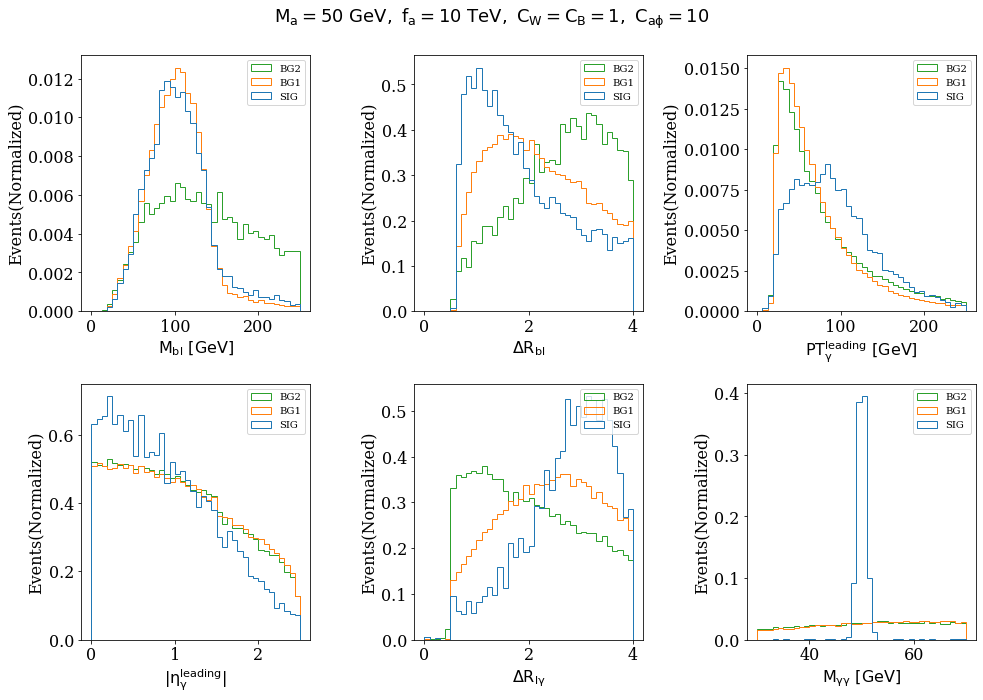

In [3]:
import matplotlib.pyplot as plt


file1=[Sig1["Mbl"],BG1["Mbl"],BG2["Mbl"]]
file2=[Sig1["DRbl"],BG1["DRbl"],BG2["DRbl"]]
file3=[Sig1["Pa1"],BG1["Pa1"],BG2["Pa1"]]
file4=[np.abs(Sig1["Etaa1"]),np.abs(BG1["Etaa1"]),np.abs(BG2["Etaa1"])]
file5=[Sig1["DRla"],BG1["DRla"],BG2["DRla"]]
file6=[Sig1["Maa"],BG1["Maa"],BG2["Maa"]]



    
bins = 40
fs = 16
tagsize = 16

font = {'family': 'serif', 'size': 18}
plt.rc('font', **font)

fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# X-axis labels for each subplot
x_labels = [
    ['$ \\rm M_{bl}~[GeV]$','$\\rm \\Delta R_{bl}$','$\\rm PT^{leading}_{\gamma}~[GeV]$'],
    ['$|\\rm \\eta^{leading}_{\gamma}|$','$\\rm \\Delta R_{l\gamma}$','$\\rm M_{\gamma\gamma}~[GeV]$']
    #['|$ \\rm \eta_b$|', '$\\rm PT_l$', '|$\\rm \eta_l$|']
]
x_ranges = [
    [[0, 250], [0, 4], [0, 250]],  # X-ranges for the first row
    [[0, 2.5], [0,4], [30, 70]],  # X-ranges for the second row
    #[[0, 5], [0, 300], [0, 3]]  # X-ranges for the third row
]

labels = ['SIG', 'BG1', 'BG2']
labels_2 = ['SIG', 'BG1', 'BG2']
#labels_3 = ['Sig', 'BG1', 'BG2']

# Iterate over rows and columns
for i in range(2):
    for j in range(3):
        ax = axes[i, j]

        # Adjust the index based on the parameter you want to plot
        data = [
            [file1, file2, file3],
            [file4, file5, file6],
            #[file7, file8, file9]
        ][i][j]

        ax.hist(data, density=True, bins=bins, histtype='step', range=x_ranges[i][j], label=[
            labels,
            labels_2,
            #labels_3
        ][i])

        ax.legend(fontsize=10)  # Assuming tagsize is defined elsewhere in your code
        #ax.set_yscale('log')
        #ax.set_xscale('log')
        ax.set_xlabel(x_labels[i][j], fontsize=fs)  # Use different x-axis labels for each subplot
        ax.set_ylabel("Events(Normalized)", fontsize=fs)
        ax.tick_params(axis='both', labelsize=fs)  # Set tick label font size
        #ax.set_title("$\\rm M_{a}=50~GeV,~f=1~TeV,~C_W=C_B=1 $", fontsize=fs)

# Adjust layout
fig.suptitle("$\\rm M_{a}=50~GeV,~f_a=10~TeV,~C_W=C_B=1,~C_{a\phi}=10$", **font)
plt.tight_layout()
plt.savefig("KE_50_Det.pdf")
plt.show()

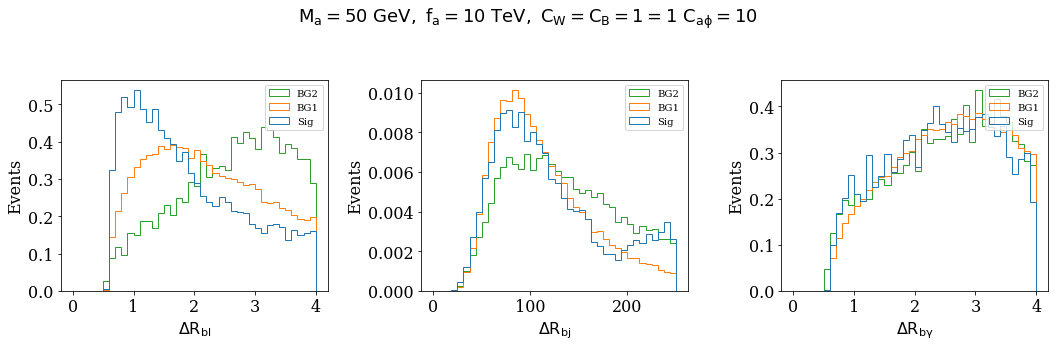

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
file1 = [Sig1["DRbl"], BG1["DRbl"], BG2["DRbl"]]
file2 = [Sig1["DRbj"], BG1["DRbj"], BG2["DRbj"]]
file3 = [Sig1["DRba"], BG1["DRba"], BG2["DRba"]]
file4 = [Sig1["DRla"], BG1["DRla"], BG2["DRla"]]


bins = 40
fs = 16

font = {'family': 'serif', 'size': 18}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# X-axis labels for each subplot
x_labels = ['$\\rm \\Delta R_{bl}$', '$\\rm \\Delta R_{bj}$', '$\\rm \\Delta R_{b\\gamma}$']
x_ranges = [[0, 4], [0, 250], [0, 4]]

# Iterate over the columns
for j, ax in enumerate(axes):
    data = [file1, file2, file3][j]
    
    ax.hist(data, density=True, bins=bins, histtype='step', range=x_ranges[j], label=['Sig', 'BG1', 'BG2'])
    ax.legend(fontsize=10)
    ax.set_xlabel(x_labels[j], fontsize=fs)
    ax.set_ylabel("Events", fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

# Adjust layout
fig.suptitle("$\\rm M_{a}=50~GeV,~f_a=10~TeV,~C_W=C_B=1=1~C_{a\phi}=10$", **font)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
#plt.savefig("KE_50_b.pdf")
plt.show()


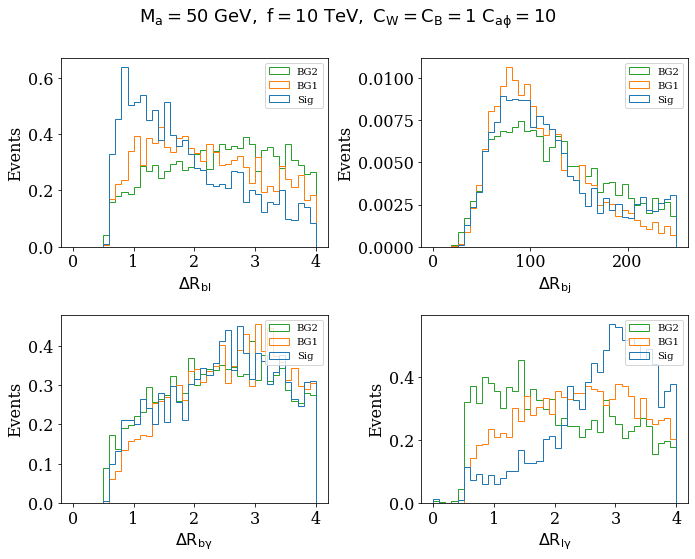

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
file1 = [Sig1["DRbl"], BG1["DRbl"], BG2["DRbl"]]
file2 = [Sig1["DRbj"], BG1["DRbj"], BG2["DRbj"]]
file3 = [Sig1["DRba"], BG1["DRba"], BG2["DRba"]]
file4 = [Sig1["DRla"], BG1["DRla"], BG2["DRla"]]

bins = 40
fs = 16

font = {'family': 'serif', 'size': 18}
plt.rc('font', **font)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# X-axis labels for each subplot
x_labels = ['$\\rm \\Delta R_{bl}$', '$\\rm \\Delta R_{bj}$', '$\\rm \\Delta R_{b\\gamma}$', '$\\rm \\Delta R_{l\\gamma}$']
x_ranges = [[0, 4], [0, 250], [0, 4], [0, 4]]

# Data for each subplot
data_files = [file1, file2, file3, file4]

# Iterate over the 2x2 grid of axes
for i, ax in enumerate(axes.flatten()):
    data = data_files[i]
    
    ax.hist(data, density=True, bins=bins, histtype='step', range=x_ranges[i], label=['Sig', 'BG1', 'BG2'])
    ax.legend(fontsize=10)
    ax.set_xlabel(x_labels[i], fontsize=fs)
    ax.set_ylabel("Events", fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

# Adjust layout
fig.suptitle("$\\rm M_{a}=50~GeV,~f=10~TeV,~C_W=C_B=1~C_{a\\phi}=10$", **font)
plt.tight_layout()  # Adjust layout to make room for the suptitle
plt.savefig("KE_50_b.pdf")
plt.show()


In [11]:
len(BG2["DRbl"])

5000